In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
data = pd.read_csv('tcc_ceds_music.csv')  
print(data.head())

   Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadne

## Exploratory Data Analysis (EDA)

### Distribution of Songs by Genre <br>


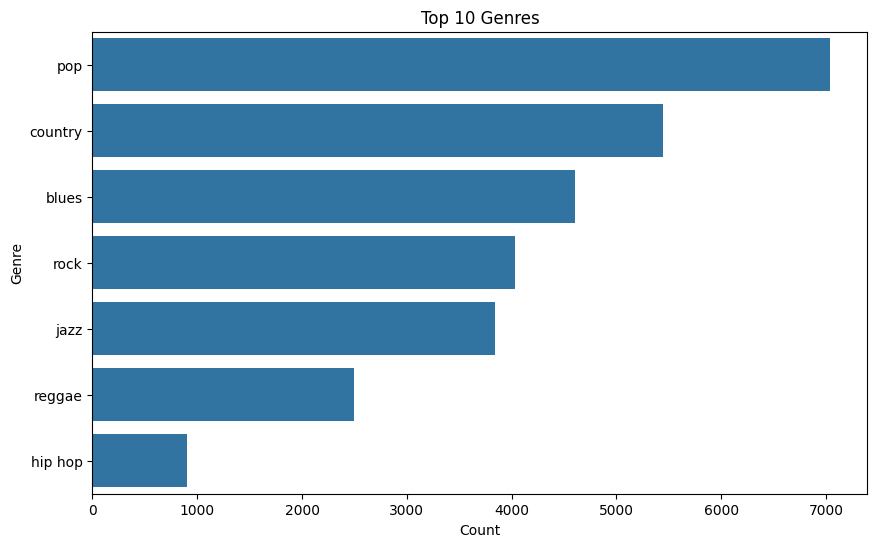

In [8]:

# Distribution of Songs by Genre
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### Top Artists by Song Count <br>
We identify the most popular artists based on the number of songs they have in the dataset.


C:\Users\AFSL\AppData\Local\Temp\ipykernel_8528\333308603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


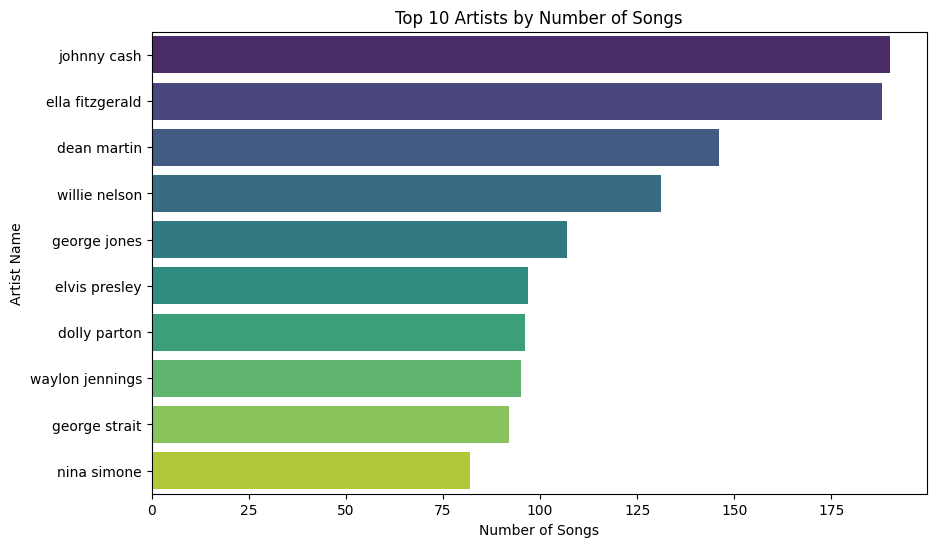

In [9]:
# Top Artists by Number of Songs
top_artists = data['artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()


# Preprocessing the Data

In [10]:
# Combine relevant text features into one
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)

In [11]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [21]:

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [21]:
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    idx = data[data['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        print(f"❌ Song '{song_title}' not found in the dataset.")
        return pd.DataFrame()
    
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]
    return data.iloc[song_indices]

# Generate & Visualize Recommendations

In [27]:
sample_song = 'hip hop'  

recommended_songs = get_recommendations(sample_song, data, cosine_sim, top_n=10)




🎧 Recommended Songs:
                track_name  artist_name    genre
28335       before hip-hop  joell ortiz  hip hop
27706              hip hop         more  hip hop
27980      be a g about it       t-rock  hip hop
28104              hip hop        lil b  hip hop
28097              hip-hop        d.ace  hip hop
27627              hip hop      krs-one  hip hop
27862              hip hop    meek mill  hip hop
27630  i do it for hip hop     ludacris  hip hop
27559           my hip hop  black noise  hip hop
27705        hip-hop blues         diaz  hip hop


C:\Users\AFSL\AppData\Local\Temp\ipykernel_8528\18578569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')


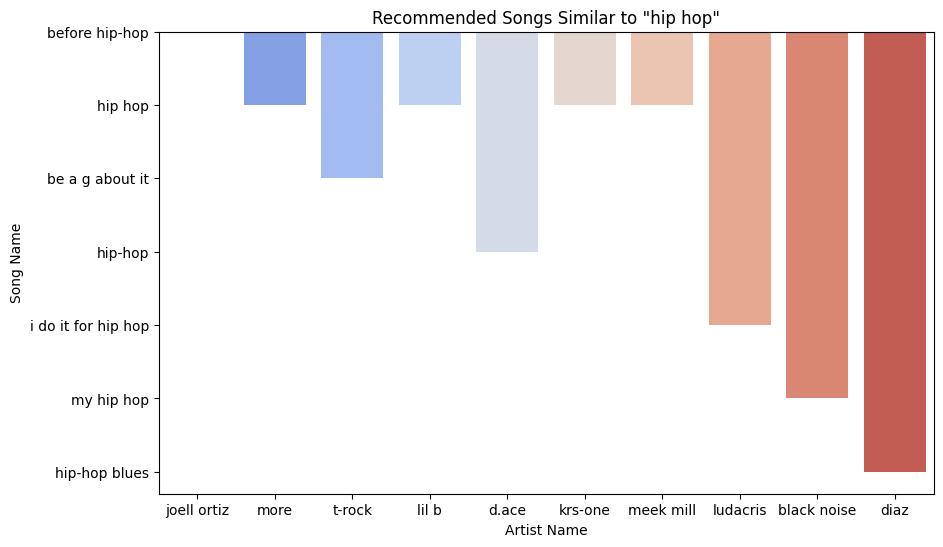

In [28]:
if not recommended_songs.empty:
    print("\n🎧 Recommended Songs:")
    print(recommended_songs[['track_name', 'artist_name', 'genre']])

    # Plot Recommendations
    plt.figure(figsize=(10, 6))
    sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')
    plt.title(f'Recommended Songs Similar to "{sample_song}"')
    plt.xlabel('Artist Name')
    plt.ylabel('Song Name')
    plt.show()
